# 회귀( Regression ) 예측
수치형 값을 예측 ( y의 값이 연속된 수치로 표현됨 ( 실수 ))

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
data = load_boston()

In [ ]:
print(data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(
    data['data'],
    columns=data['feature_names']
)

In [ ]:
df['MEDV'] = data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)

데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    df.drop("MEDV", axis=1),
    df["MEDV"]
)

X_train.shape, X_valid.shape

((379, 13), (127, 13))

In [ ]:
y_train.shape, y_valid.shape

((379,), (127,))

# 평가 지표 만들기
**MSE(Mean Squared Error)**
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2
$$
예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 **제곱**에 대하여 평균을 낸 값

**MAE(Mean Absolute Error)**
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}\left | \hat{y}_i - t_i \right |
$$

예측값($\hat{y}$)과 실제값($t$)의 차이에 대한 **절대값**에 대하여 평균을 낸 값

**RMSE(Root Mean Squared Error)**
$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{y}_i-t_i)^2}
$$

$MSE$에 root 를 씌운 값으로써 실제 오차의 평균이라고 봐도 무방

In [ ]:
pred = np.array([3.0, 4.0, 5.3])
actual = np.array([1.0, 3.8, 6.8])

MSE 구현

In [ ]:
def my_mean_squared_error(y, t):
  return ((y - t)**2).mean()

In [ ]:
my_mean_squared_error(pred, actual)

2.0966666666666667

MAE 구현 ( 절대값 : `np.abs()` )

In [ ]:
def my_mean_absolute_error(y, t):
  return np.abs(y - t).mean()

In [ ]:
my_mean_absolute_error(pred, actual)

1.2333333333333334

RMSE 구현

In [ ]:
def my_root_mean_squared_error(y, t):
  return np.sqrt(my_mean_squared_error(y, t))

In [ ]:
my_root_mean_squared_error(pred, actual)

1.4479871085982314

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': actual})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs=-1) # n_jobs : 사용할 CPU 코어의 개수. -1이면 CPU의 모든 코어를 활용
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [ ]:
pred = model.predict(X_valid)

시각화로 확인해 보기

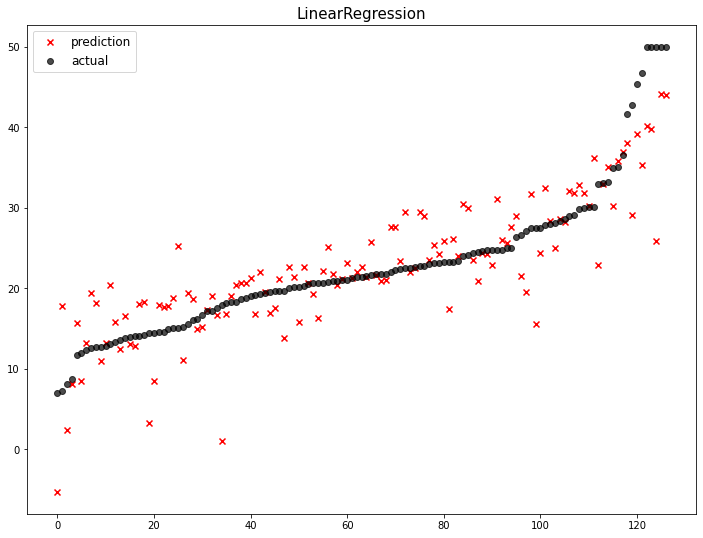

              model        mse
0  LinearRegression  27.002367


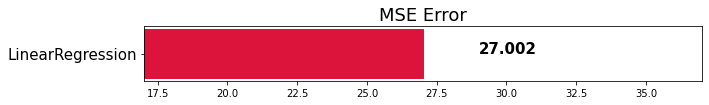

In [ ]:
mse_eval('LinearRegression', pred, y_valid)

결정 계수 지표($R^2$)
* 분류에서의 score에 해당

In [ ]:
model.score(X_valid, y_valid)

0.6682598074832264

In [ ]:
model.score(X_train, y_train)

0.7609908104449217

## LinearRegression의 수식
* 기울기(W), 편향(b)
* 기울기는 다른말로 가중치(Weights)라고 한다.

## 가중치의 의미
* 입력되고 있는 데이터($x$)들의 각각의 중요도를 판단 하는 것
  * 어떠한 중요도? : 예측값($\hat{y}$)에 얼마나 많이 영향을 끼칠 것인가
* 가중치의 절대값이 커지면 예측값에 영향을 많이 미친다.
  * 모델이 복잡해 진다.
* 가중치의 절대값이 작아지면 예측값에 영향을 덜 미친다.
  * 모델이 단순해 진다.

# LinearRegression은 가중치를 조절할 방법이 없습니다.
## 규제($\alpha$ - Regularization)를 사용하는 모델을 사용해서 가중치를 조절

* $\alpha$ : **penalty**부여 매개변수 ( 또는 람다($\lambda$) )


## 규제 방식
**L2 규제(L2 Regularization)**
  * 각 **가중치 제곱의 합**에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.
    * $\alpha$를 크게 하면 가중치가 더 많이 감소 (규제를 더 중요하게 생각하겠다.)
    * $\alpha$를 작게 하면 가중치가 증가한다.( 규제를 중요하게 생각하지 않음 )

**L1 규제(L1 Regularization)**
  * **가중치의 합**을 더한 값에 규제 강도인 ($\alpha$)를 곱하여 오차에 더한다.
  * 어떤 가중치는 실제 0이 되어버린다. 즉, 모델에서 완전히 제외되는 특성이 생긴다.
    * 모델이 특성을 선택

**L2 규제가 L1규제에 비해 안정적이라 일반적으로는 L2규제가 더 많이 사용된다.**

**릿지(Ridge) - L2 규제**
$$
  E = MSE + \alpha \sum w^2
$$

**라쏘(Lasso) - L1 규제**
$$
  E = MSE + \alpha \sum |w|
$$



In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 커질 수록 큰 규제 - 가중치가 줄어든다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001] # 로그 스케일로 조절하는게 좋다.( 10배 또는 1/10로 )

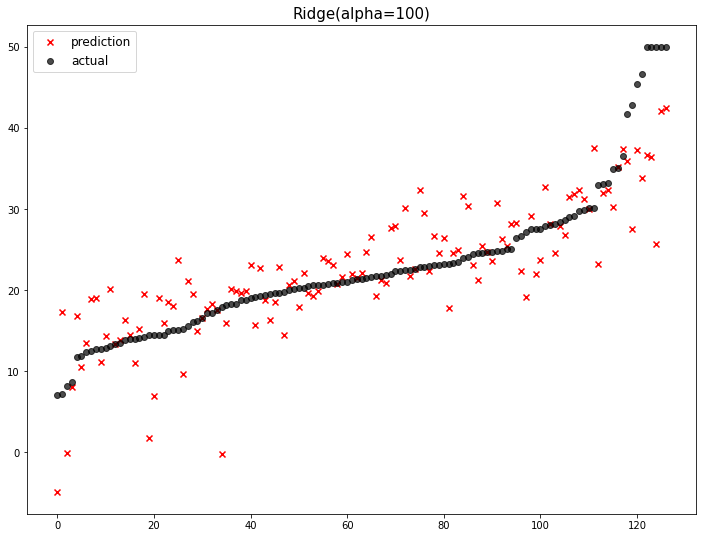

              model        mse
0  Ridge(alpha=100)  30.536444
1  LinearRegression  27.002367


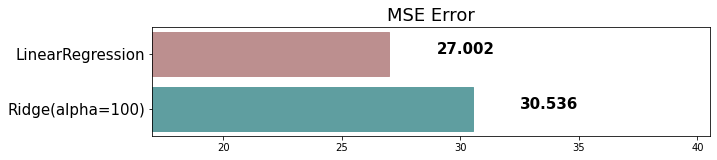

Ridge(alpha=100) Train Score : 0.7382631806218591 / Valid Score : 0.6248415686107136


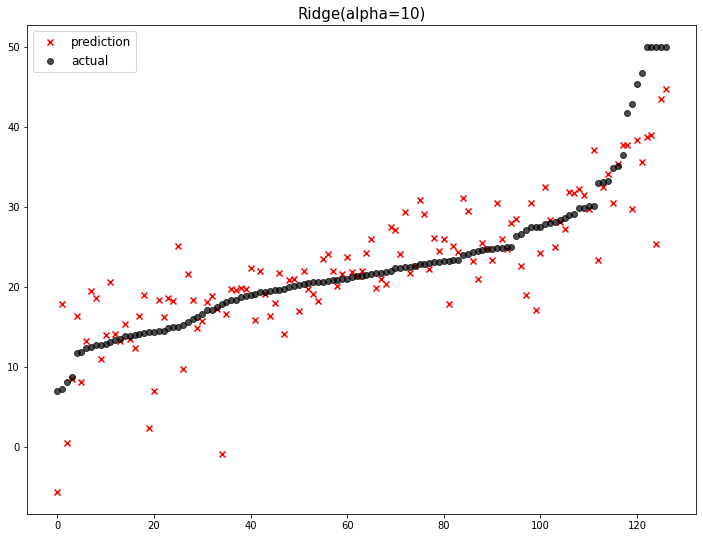

              model        mse
0  Ridge(alpha=100)  30.536444
1   Ridge(alpha=10)  28.397953
2  LinearRegression  27.002367


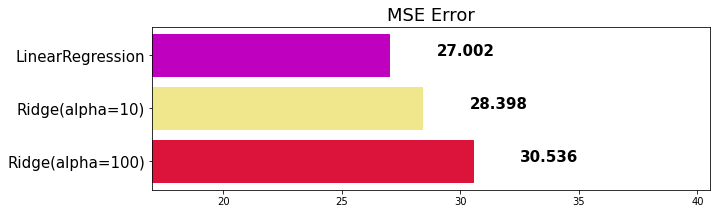

Ridge(alpha=10) Train Score : 0.7518776724040763 / Valid Score : 0.6511142058720127


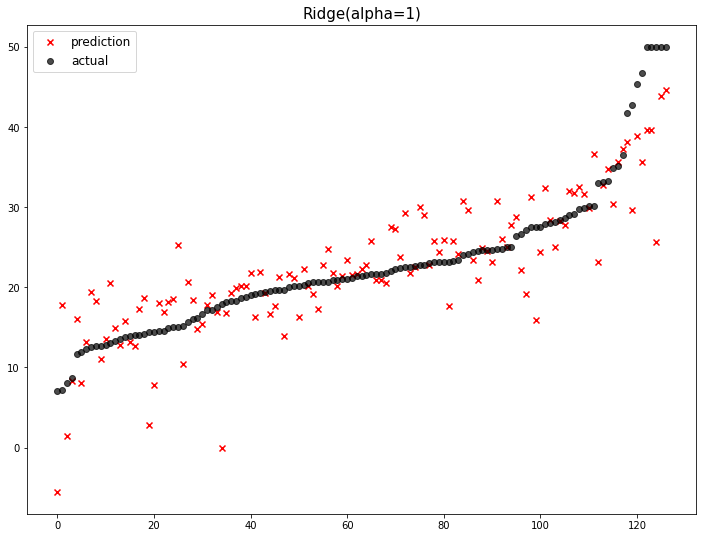

              model        mse
0  Ridge(alpha=100)  30.536444
1   Ridge(alpha=10)  28.397953
2    Ridge(alpha=1)  27.390956
3  LinearRegression  27.002367


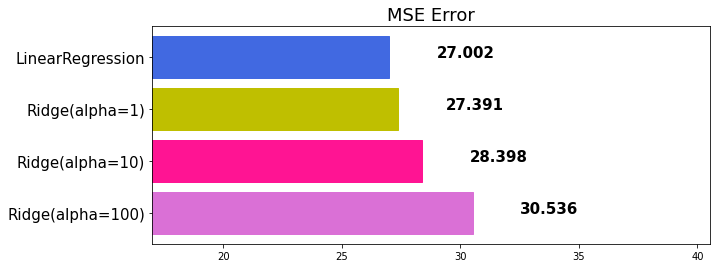

Ridge(alpha=1) Train Score : 0.7587586349897757 / Valid Score : 0.6634857659048116


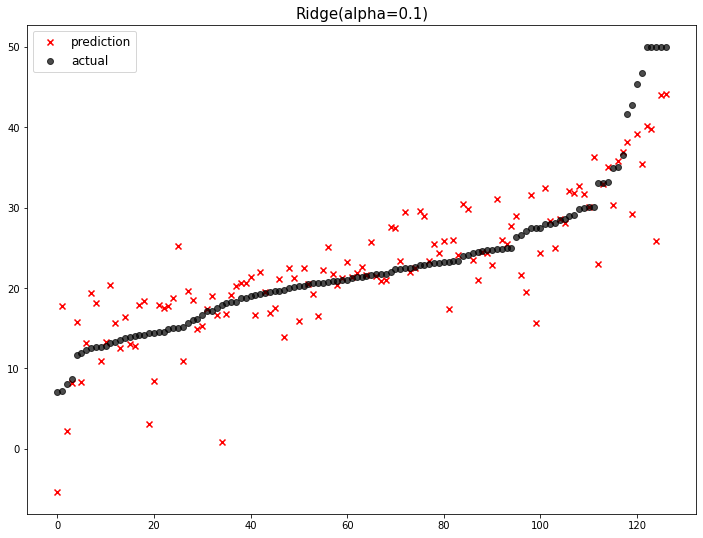

              model        mse
0  Ridge(alpha=100)  30.536444
1   Ridge(alpha=10)  28.397953
2    Ridge(alpha=1)  27.390956
3  Ridge(alpha=0.1)  27.041397
4  LinearRegression  27.002367


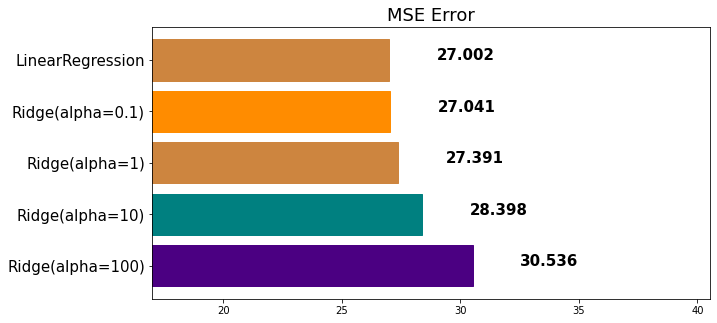

Ridge(alpha=0.1) Train Score : 0.7609269105141261 / Valid Score : 0.667780302646253


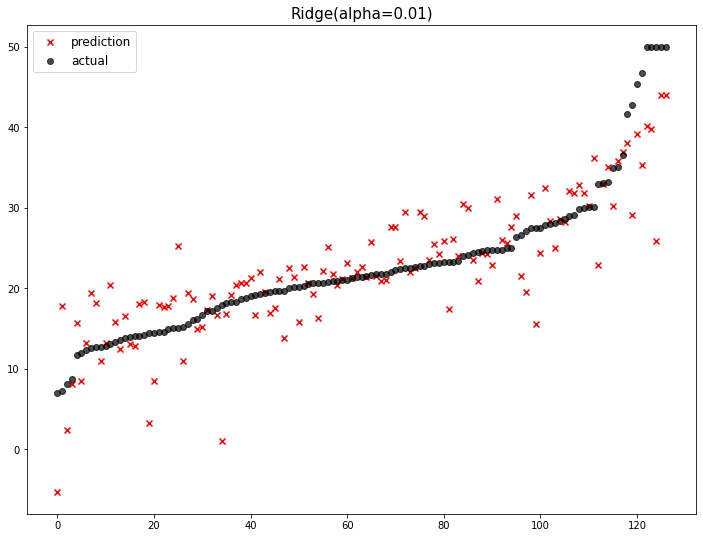

               model        mse
0   Ridge(alpha=100)  30.536444
1    Ridge(alpha=10)  28.397953
2     Ridge(alpha=1)  27.390956
3   Ridge(alpha=0.1)  27.041397
4  Ridge(alpha=0.01)  27.006064
5   LinearRegression  27.002367


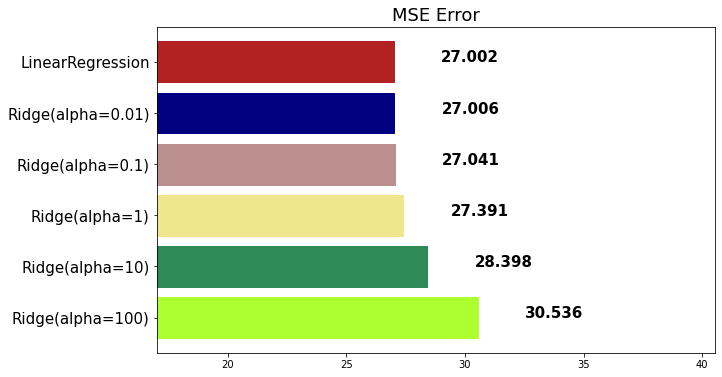

Ridge(alpha=0.01) Train Score : 0.7609900727342014 / Valid Score : 0.6682143952200194


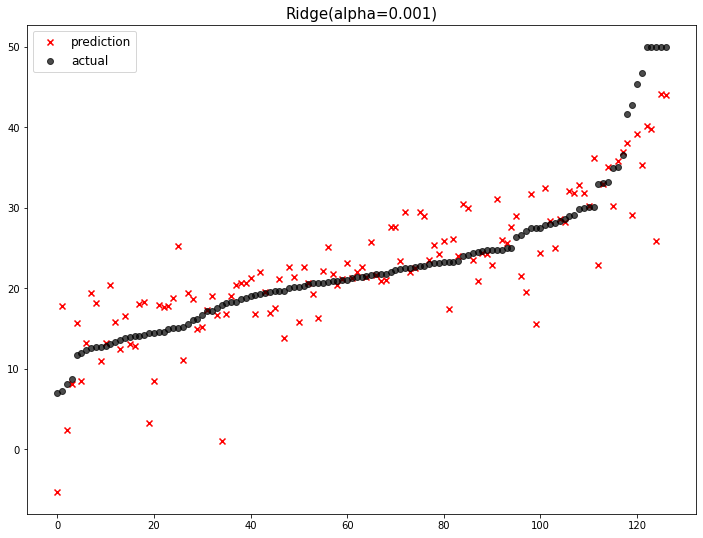

                model        mse
0    Ridge(alpha=100)  30.536444
1     Ridge(alpha=10)  28.397953
2      Ridge(alpha=1)  27.390956
3    Ridge(alpha=0.1)  27.041397
4   Ridge(alpha=0.01)  27.006064
5  Ridge(alpha=0.001)  27.002734
6    LinearRegression  27.002367


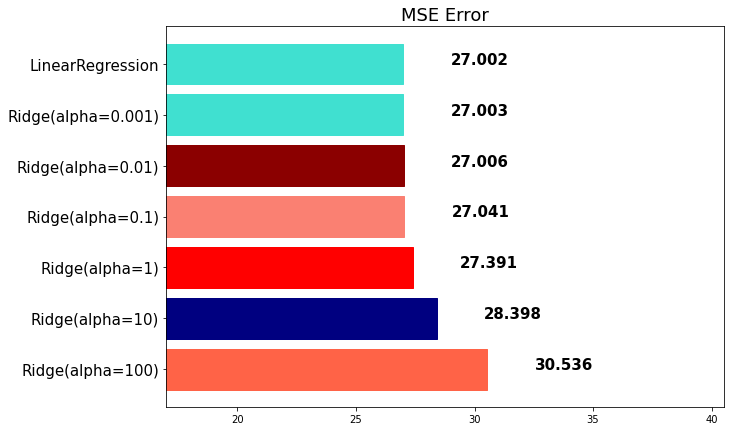

Ridge(alpha=0.001) Train Score : 0.7609908029566907 / Valid Score : 0.6682552984920098


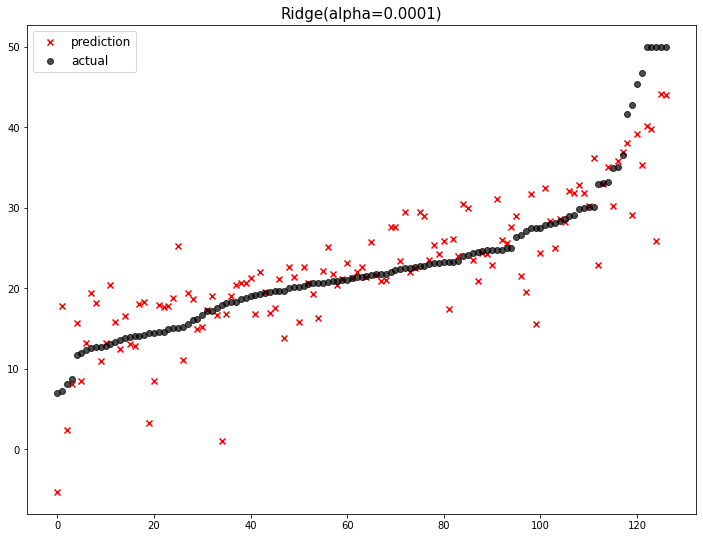

                 model        mse
0     Ridge(alpha=100)  30.536444
1      Ridge(alpha=10)  28.397953
2       Ridge(alpha=1)  27.390956
3     Ridge(alpha=0.1)  27.041397
4    Ridge(alpha=0.01)  27.006064
5   Ridge(alpha=0.001)  27.002734
6  Ridge(alpha=0.0001)  27.002404
7     LinearRegression  27.002367


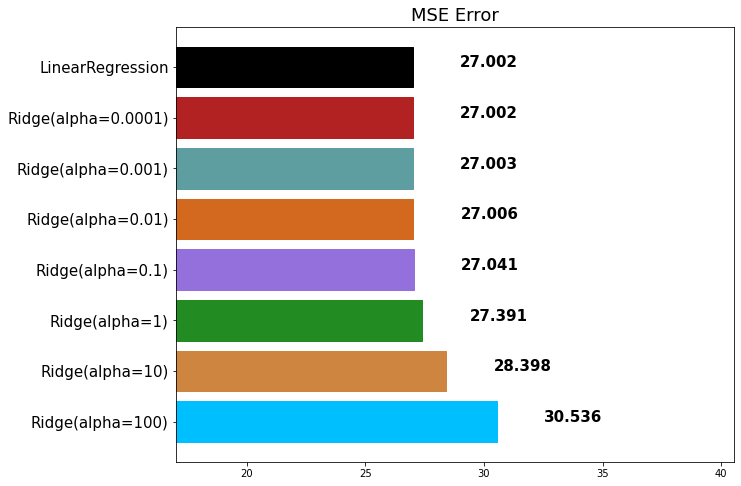

Ridge(alpha=0.0001) Train Score : 0.7609908103699268 / Valid Score : 0.6682593569142783


In [ ]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)

  pred = ridge.predict(X_valid)
  valid_score = ridge.score(X_valid, y_valid)
  train_score = ridge.score(X_train, y_train)
  
  mse_eval(f"Ridge(alpha={alpha})", pred, y_valid)
  print(f"Ridge(alpha={alpha}) Train Score : {train_score} / Valid Score : {valid_score}")

Ridge에 의해서 설정된 가중치 확인하기

In [ ]:
ridge.coef_

array([-1.19911908e-01,  5.67300478e-02,  1.13802935e-02,  1.96577807e+00,
       -1.70248918e+01,  3.54247453e+00,  6.20455288e-03, -1.58187445e+00,
        3.56733206e-01, -1.43959936e-02, -1.02942627e+00,  1.06162342e-02,
       -5.65837337e-01])

In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
def plot_coef(columns, coef):
  coef_df = pd.DataFrame(list(zip(columns, coef)))
  coef_df.columns = ["feature", "coef"]

  coef_df = coef_df.sort_values(by="coef", ascending=False).reset_index(drop=True)

  fig, ax = plt.subplots(figsize=(9, 7))
  ax.barh(np.arange(len(coef_df)), coef_df['coef'])
  
  idx = np.arange(len(coef_df))
  ax.set_yticks(idx)
  ax.set_yticklabels(coef_df['feature'])
  fig.tight_layout()
  plt.show()

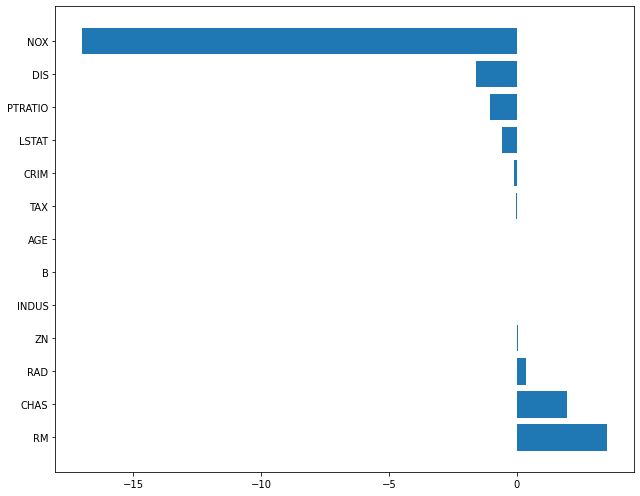

In [ ]:
plot_coef(X_train.columns, ridge.coef_)

alpha값에 따른 coef의 차이

In [ ]:
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train, y_train)
ridge_pred_100 = ridge100.predict(X_valid)

ridge001 = Ridge(alpha=0.001)
ridge001.fit(X_train, y_train)
ridge_pred_001 = ridge001.predict(X_valid)

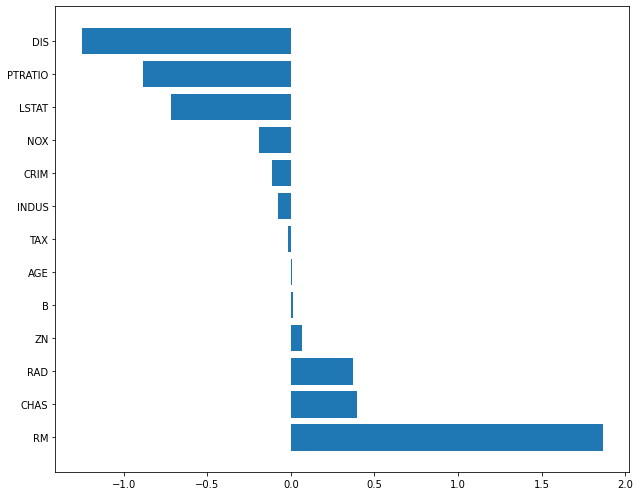

In [ ]:
# alpha가 100일 때는 가중치가 0에 가깝게 설정된 것을 확인
plot_coef(X_train.columns, ridge100.coef_)

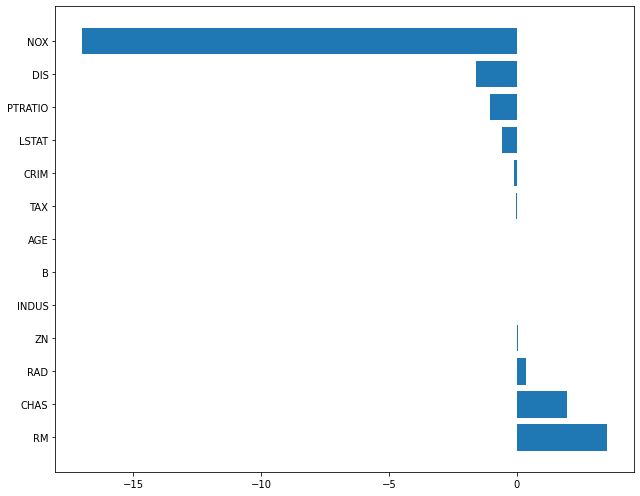

In [ ]:
plot_coef(X_train.columns, ridge001.coef_)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

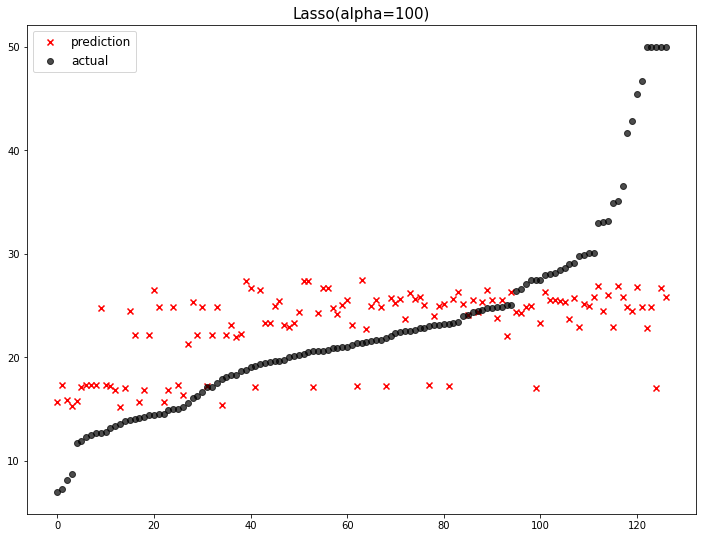

                 model        mse
0     Lasso(alpha=100)  65.531753
1     Ridge(alpha=100)  30.536444
2      Ridge(alpha=10)  28.397953
3       Ridge(alpha=1)  27.390956
4     Ridge(alpha=0.1)  27.041397
5    Ridge(alpha=0.01)  27.006064
6   Ridge(alpha=0.001)  27.002734
7  Ridge(alpha=0.0001)  27.002404
8     LinearRegression  27.002367


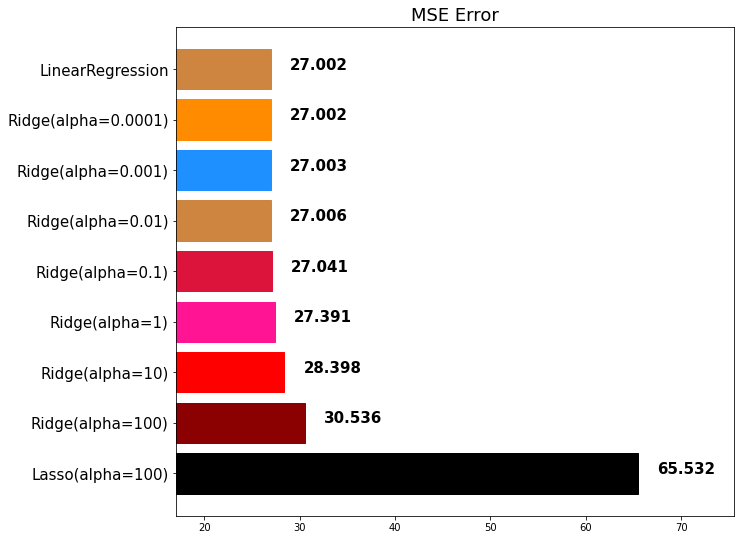

Lasso(alpha=100) Train Score : 0.2376583338934639 / Valid Score : 0.19490332343726935


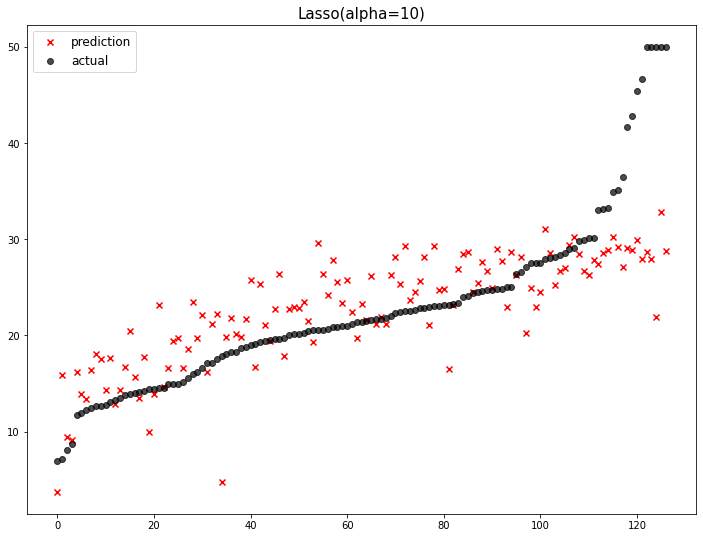

                 model        mse
0     Lasso(alpha=100)  65.531753
1      Lasso(alpha=10)  41.993402
2     Ridge(alpha=100)  30.536444
3      Ridge(alpha=10)  28.397953
4       Ridge(alpha=1)  27.390956
5     Ridge(alpha=0.1)  27.041397
6    Ridge(alpha=0.01)  27.006064
7   Ridge(alpha=0.001)  27.002734
8  Ridge(alpha=0.0001)  27.002404
9     LinearRegression  27.002367


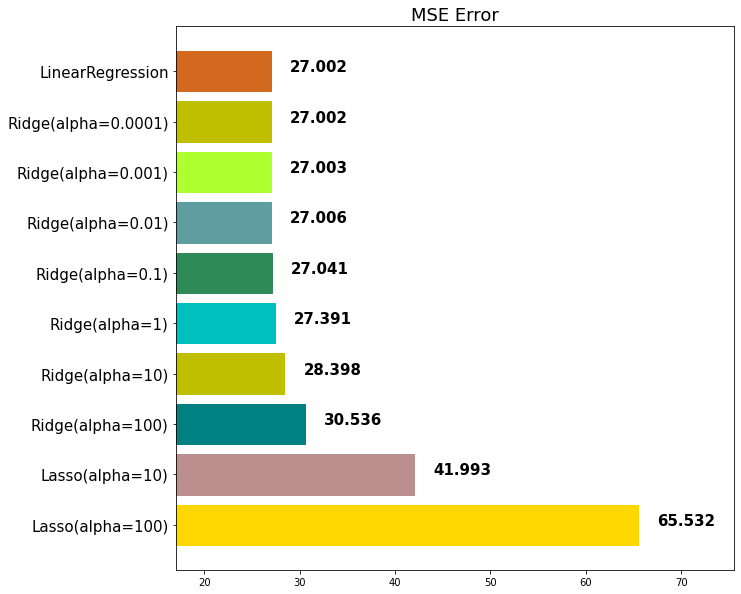

Lasso(alpha=10) Train Score : 0.540554021840161 / Valid Score : 0.48408600212221425


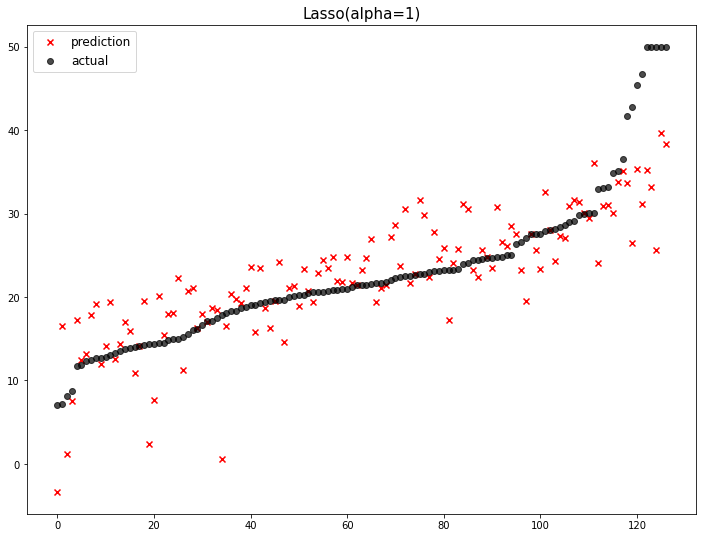

                  model        mse
0      Lasso(alpha=100)  65.531753
1       Lasso(alpha=10)  41.993402
2        Lasso(alpha=1)  32.676826
3      Ridge(alpha=100)  30.536444
4       Ridge(alpha=10)  28.397953
5        Ridge(alpha=1)  27.390956
6      Ridge(alpha=0.1)  27.041397
7     Ridge(alpha=0.01)  27.006064
8    Ridge(alpha=0.001)  27.002734
9   Ridge(alpha=0.0001)  27.002404
10     LinearRegression  27.002367


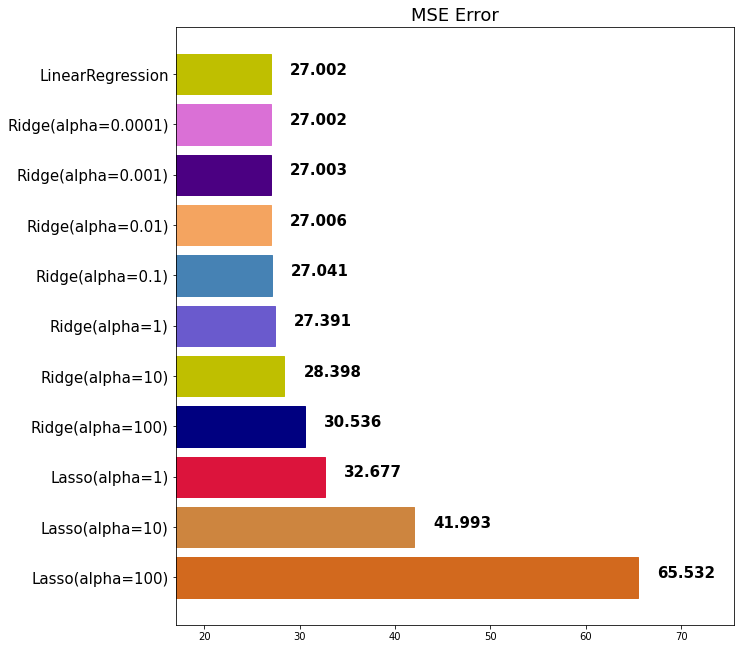

Lasso(alpha=1) Train Score : 0.7050750139117321 / Valid Score : 0.598545699018026


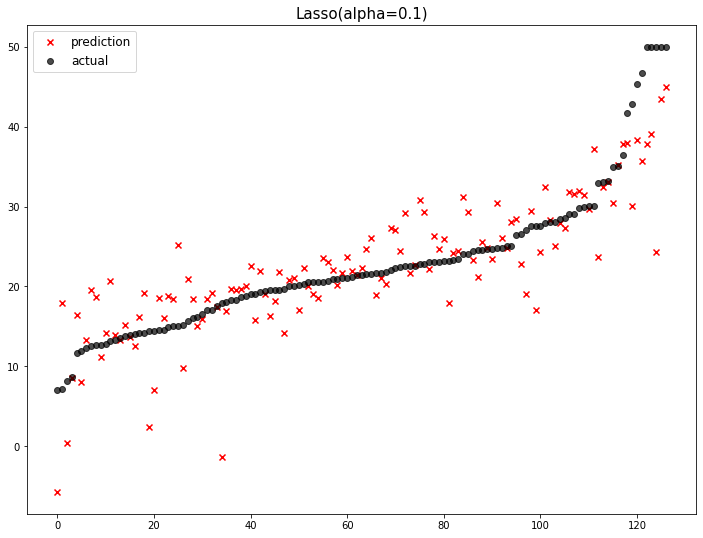

                  model        mse
0      Lasso(alpha=100)  65.531753
1       Lasso(alpha=10)  41.993402
2        Lasso(alpha=1)  32.676826
3      Ridge(alpha=100)  30.536444
4      Lasso(alpha=0.1)  28.904300
5       Ridge(alpha=10)  28.397953
6        Ridge(alpha=1)  27.390956
7      Ridge(alpha=0.1)  27.041397
8     Ridge(alpha=0.01)  27.006064
9    Ridge(alpha=0.001)  27.002734
10  Ridge(alpha=0.0001)  27.002404
11     LinearRegression  27.002367


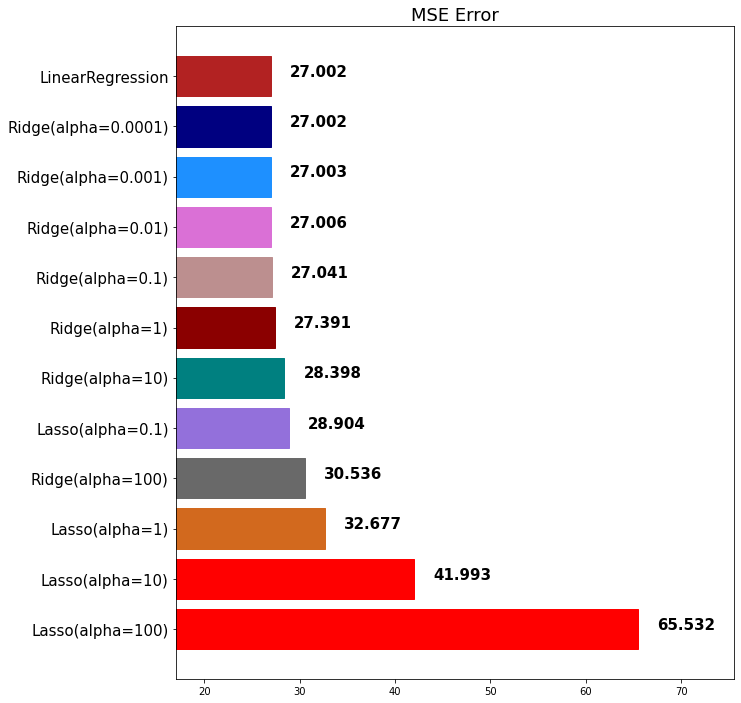

Lasso(alpha=0.1) Train Score : 0.7480961690083485 / Valid Score : 0.644893433928353


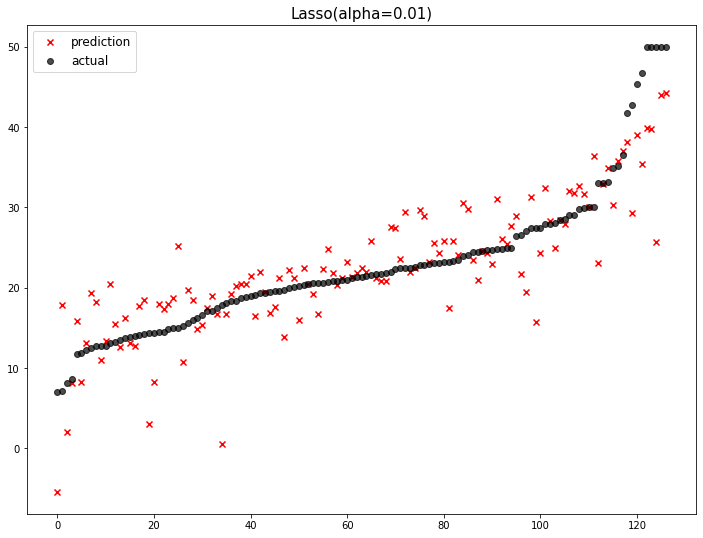

                  model        mse
0      Lasso(alpha=100)  65.531753
1       Lasso(alpha=10)  41.993402
2        Lasso(alpha=1)  32.676826
3      Ridge(alpha=100)  30.536444
4      Lasso(alpha=0.1)  28.904300
5       Ridge(alpha=10)  28.397953
6        Ridge(alpha=1)  27.390956
7     Lasso(alpha=0.01)  27.158715
8      Ridge(alpha=0.1)  27.041397
9     Ridge(alpha=0.01)  27.006064
10   Ridge(alpha=0.001)  27.002734
11  Ridge(alpha=0.0001)  27.002404
12     LinearRegression  27.002367


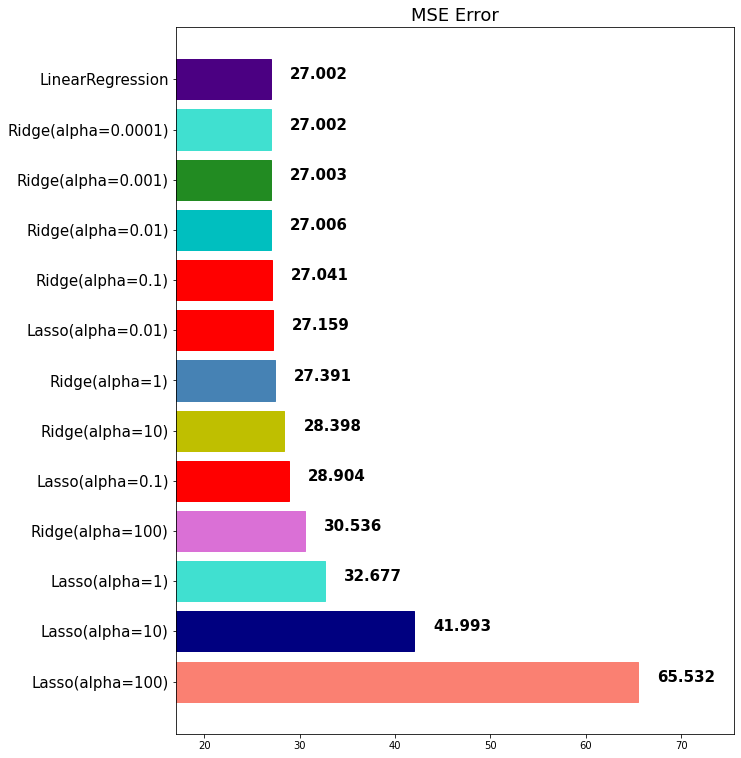

Lasso(alpha=0.01) Train Score : 0.7605816633086958 / Valid Score : 0.6663389901099341


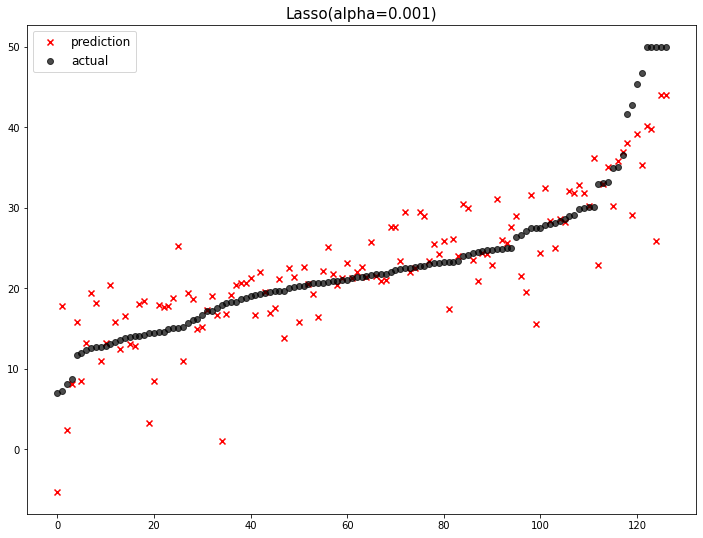

                  model        mse
0      Lasso(alpha=100)  65.531753
1       Lasso(alpha=10)  41.993402
2        Lasso(alpha=1)  32.676826
3      Ridge(alpha=100)  30.536444
4      Lasso(alpha=0.1)  28.904300
5       Ridge(alpha=10)  28.397953
6        Ridge(alpha=1)  27.390956
7     Lasso(alpha=0.01)  27.158715
8      Ridge(alpha=0.1)  27.041397
9    Lasso(alpha=0.001)  27.015422
10    Ridge(alpha=0.01)  27.006064
11   Ridge(alpha=0.001)  27.002734
12  Ridge(alpha=0.0001)  27.002404
13     LinearRegression  27.002367


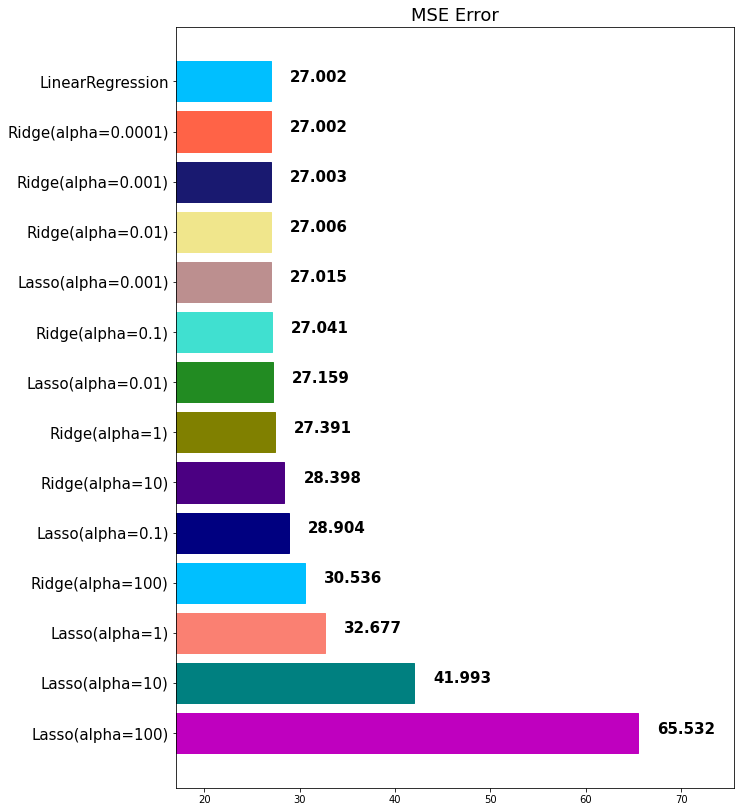

Lasso(alpha=0.001) Train Score : 0.7609866511020715 / Valid Score : 0.6680994268374038


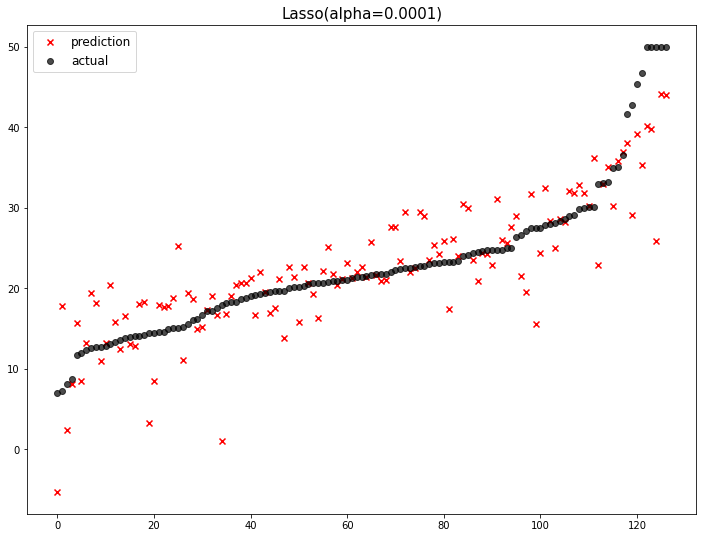

                  model        mse
0      Lasso(alpha=100)  65.531753
1       Lasso(alpha=10)  41.993402
2        Lasso(alpha=1)  32.676826
3      Ridge(alpha=100)  30.536444
4      Lasso(alpha=0.1)  28.904300
5       Ridge(alpha=10)  28.397953
6        Ridge(alpha=1)  27.390956
7     Lasso(alpha=0.01)  27.158715
8      Ridge(alpha=0.1)  27.041397
9    Lasso(alpha=0.001)  27.015422
10    Ridge(alpha=0.01)  27.006064
11  Lasso(alpha=0.0001)  27.003644
12   Ridge(alpha=0.001)  27.002734
13  Ridge(alpha=0.0001)  27.002404
14     LinearRegression  27.002367


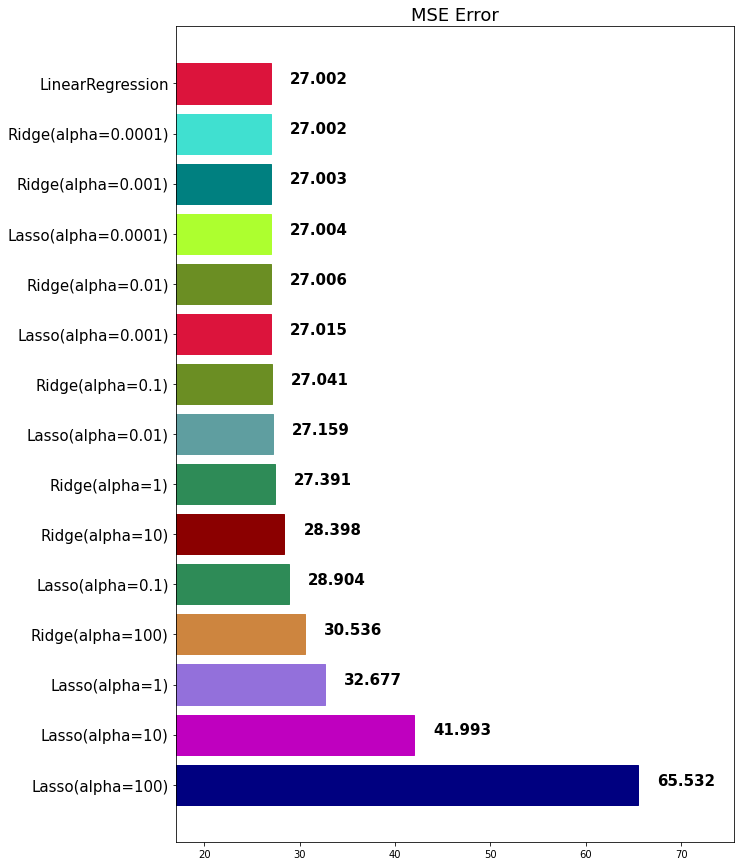

Lasso(alpha=0.0001) Train Score : 0.7609907688528524 / Valid Score : 0.6682441238188318


In [ ]:
for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train, y_train)
  pred = lasso.predict(X_valid)
  mse_eval(f"Lasso(alpha={alpha})", pred, y_valid)

  train_score = lasso.score(X_train, y_train)
  valid_score = lasso.score(X_valid, y_valid)

  print(f"Lasso(alpha={alpha}) Train Score : {train_score} / Valid Score : {valid_score}")

In [ ]:
lasso100 = Lasso(alpha=100)
lasso100.fit(X_train, y_train)
lasso100_pred = lasso100.predict(X_valid)

lasso001 = Lasso(alpha=0.001)
lasso001.fit(X_train, y_train)
lasso001.pred = lasso001.predict(X_valid)

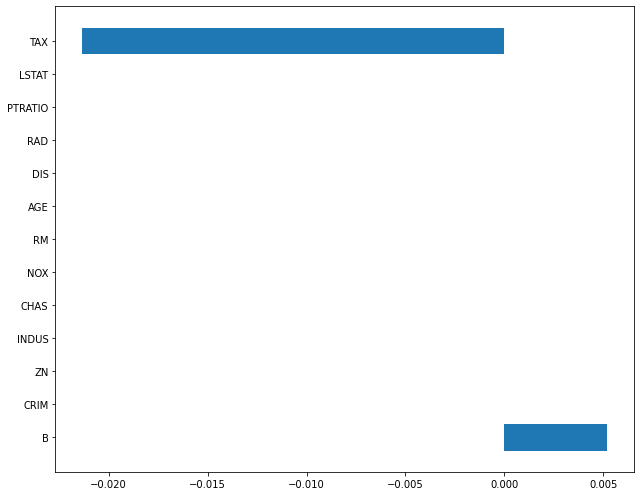

In [ ]:
plot_coef(X_train.columns, lasso100.coef_)

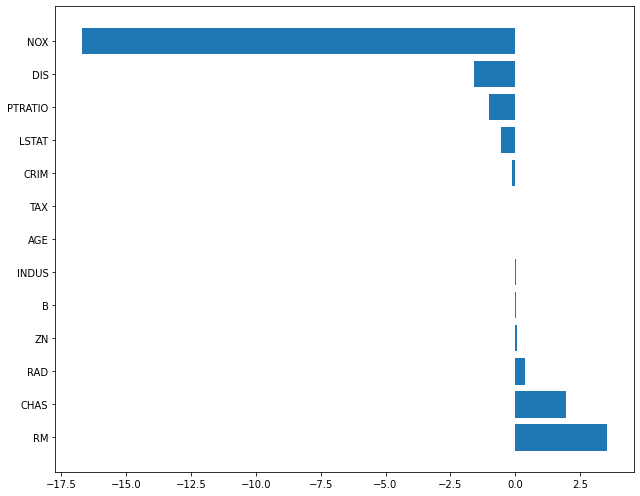

In [ ]:
plot_coef(X_train.columns, lasso001.coef_)

# ElasticNet
* Ridge와 Lasso의 규제 방식을 같이 사용
* l1_ratio ( default = 0.5 )
  * l1_ratio = 0 ( L2 만 사용 )
  * l1_ratio = 1 ( L1 만 사용 )
  * 0 < l1_ratio < 1 ( L1과 L2의 혼합사용)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2, 0.5, 0.8]

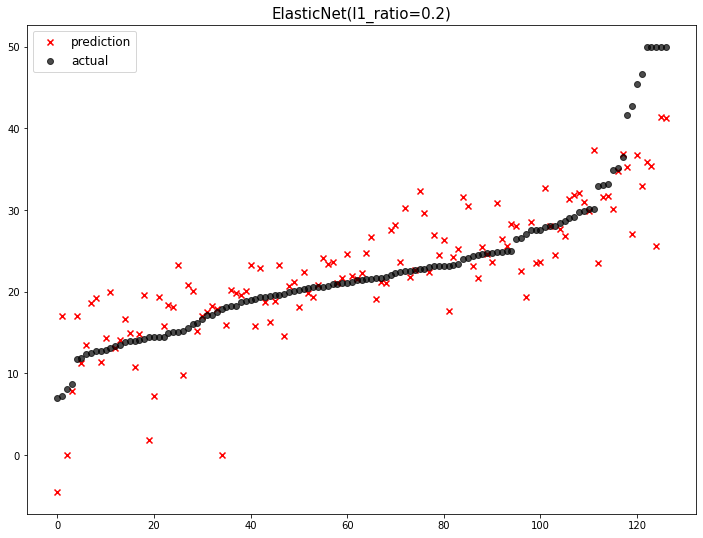

                       model        mse
0           Lasso(alpha=100)  65.531753
1            Lasso(alpha=10)  41.993402
2             Lasso(alpha=1)  32.676826
3   ElasticNet(l1_ratio=0.2)  31.310902
4           Ridge(alpha=100)  30.536444
5           Lasso(alpha=0.1)  28.904300
6            Ridge(alpha=10)  28.397953
7             Ridge(alpha=1)  27.390956
8          Lasso(alpha=0.01)  27.158715
9           Ridge(alpha=0.1)  27.041397
10        Lasso(alpha=0.001)  27.015422
11         Ridge(alpha=0.01)  27.006064
12       Lasso(alpha=0.0001)  27.003644
13        Ridge(alpha=0.001)  27.002734
14       Ridge(alpha=0.0001)  27.002404
15          LinearRegression  27.002367


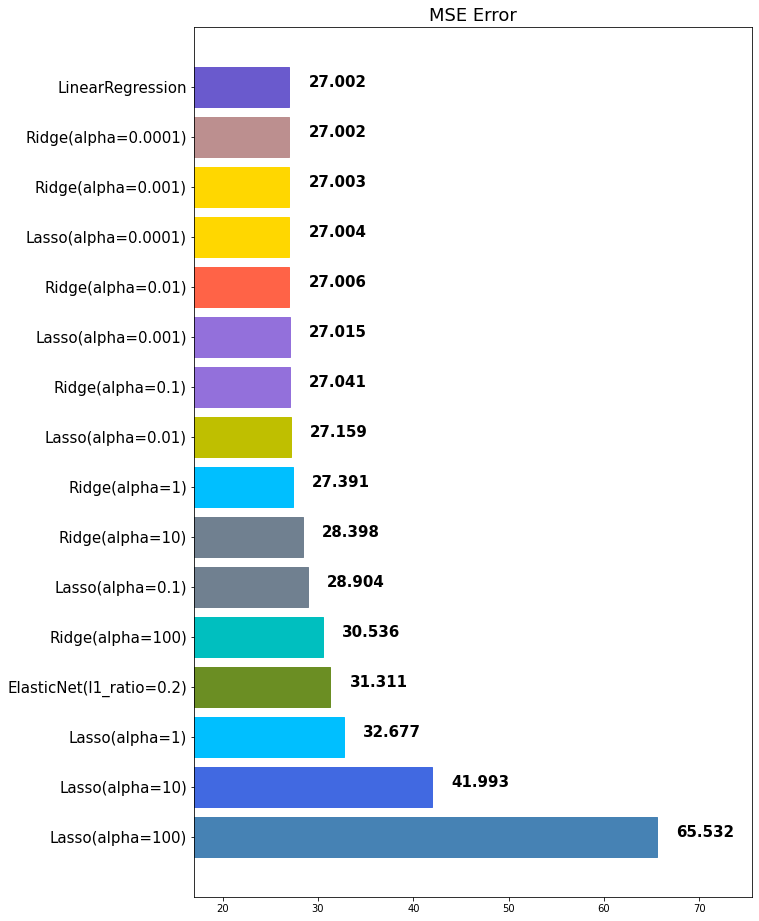

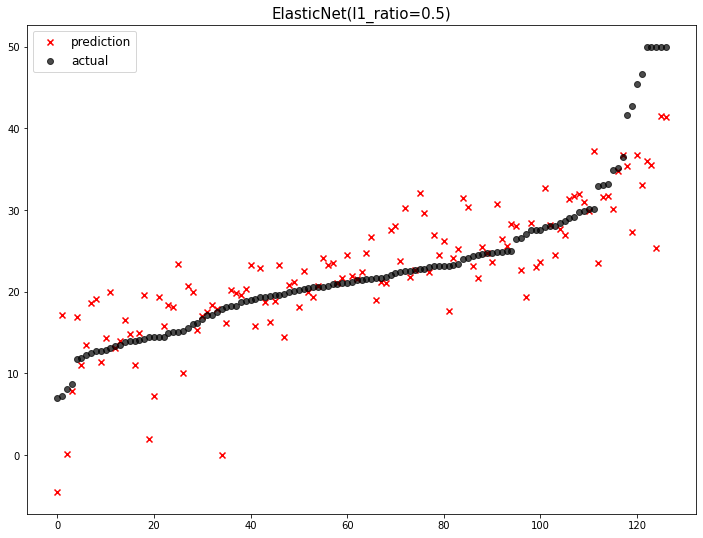

                       model        mse
0           Lasso(alpha=100)  65.531753
1            Lasso(alpha=10)  41.993402
2             Lasso(alpha=1)  32.676826
3   ElasticNet(l1_ratio=0.2)  31.310902
4   ElasticNet(l1_ratio=0.5)  31.012845
5           Ridge(alpha=100)  30.536444
6           Lasso(alpha=0.1)  28.904300
7            Ridge(alpha=10)  28.397953
8             Ridge(alpha=1)  27.390956
9          Lasso(alpha=0.01)  27.158715
10          Ridge(alpha=0.1)  27.041397
11        Lasso(alpha=0.001)  27.015422
12         Ridge(alpha=0.01)  27.006064
13       Lasso(alpha=0.0001)  27.003644
14        Ridge(alpha=0.001)  27.002734
15       Ridge(alpha=0.0001)  27.002404
16          LinearRegression  27.002367


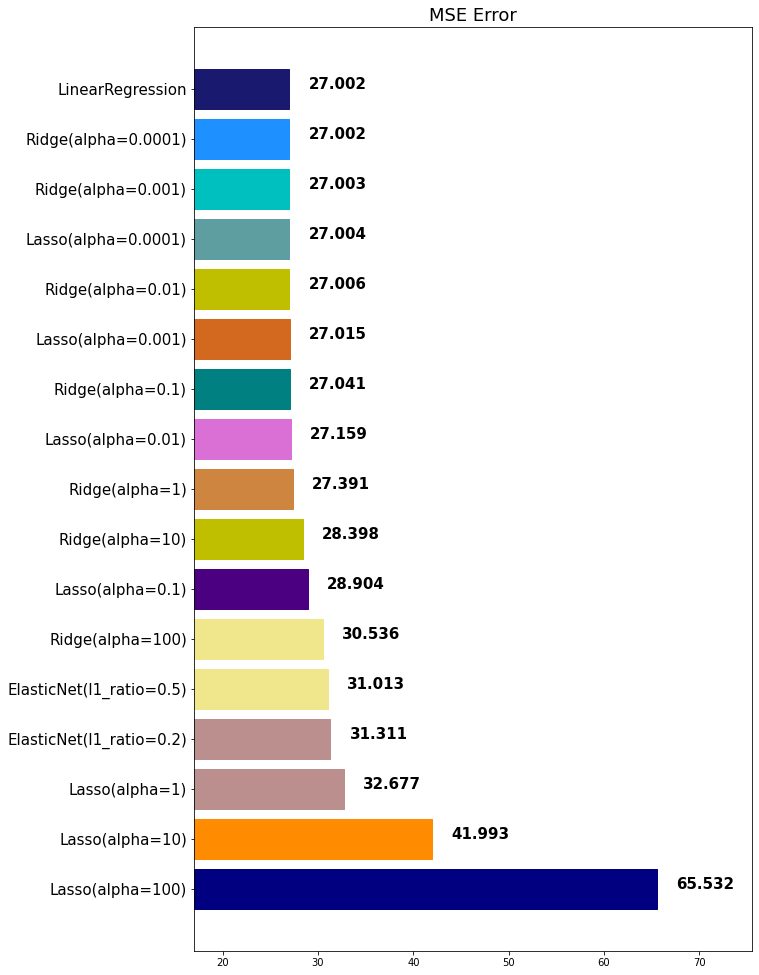

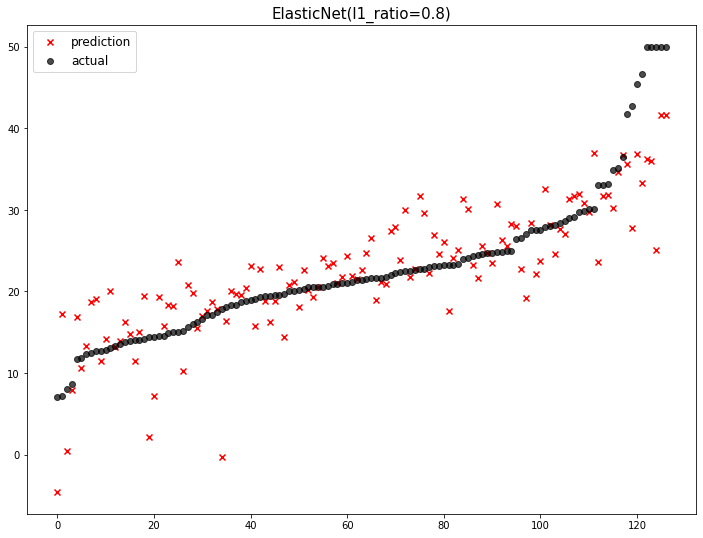

                       model        mse
0           Lasso(alpha=100)  65.531753
1            Lasso(alpha=10)  41.993402
2             Lasso(alpha=1)  32.676826
3   ElasticNet(l1_ratio=0.2)  31.310902
4   ElasticNet(l1_ratio=0.5)  31.012845
5           Ridge(alpha=100)  30.536444
6   ElasticNet(l1_ratio=0.8)  30.465026
7           Lasso(alpha=0.1)  28.904300
8            Ridge(alpha=10)  28.397953
9             Ridge(alpha=1)  27.390956
10         Lasso(alpha=0.01)  27.158715
11          Ridge(alpha=0.1)  27.041397
12        Lasso(alpha=0.001)  27.015422
13         Ridge(alpha=0.01)  27.006064
14       Lasso(alpha=0.0001)  27.003644
15        Ridge(alpha=0.001)  27.002734
16       Ridge(alpha=0.0001)  27.002404
17          LinearRegression  27.002367


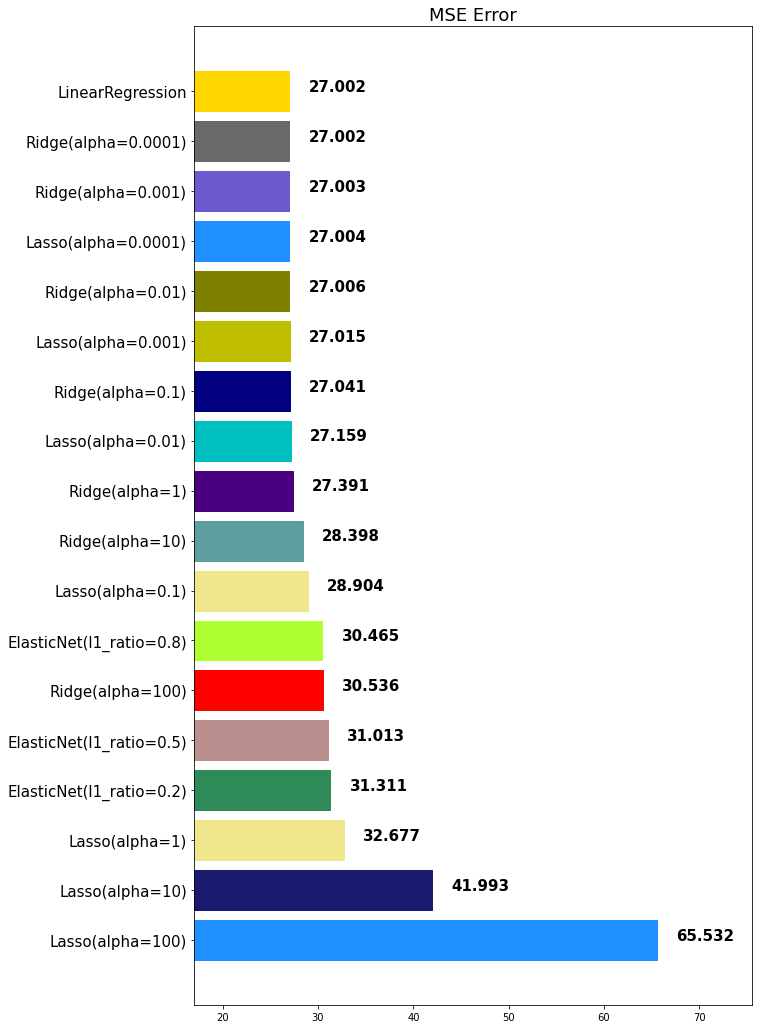

In [ ]:
for ratio in ratios:
  elastic_net = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elastic_net.fit(X_train, y_train)

  pred = elastic_net.predict(X_valid)
  mse_eval("ElasticNet(l1_ratio={})".format(ratio), pred, y_valid)

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.897588,11.149077,11.193905,0.071240,0.558171,6.293264,69.042744,3.772054,9.810026,412.881266,18.442744,354.681478,12.657282
std,9.301059,23.267414,6.814433,0.257566,0.119631,0.686022,27.776547,2.104940,8.848269,170.124306,2.151281,94.002318,7.181463
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.079640,0.000000,5.130000,0.000000,0.451000,5.876000,46.050000,2.108400,4.000000,280.500000,17.400000,374.695000,6.900000
50%,0.283920,0.000000,9.900000,0.000000,0.538000,6.212000,77.300000,3.099300,5.000000,335.000000,18.900000,391.430000,11.380000
75%,3.944055,12.500000,18.100000,0.000000,0.639000,6.638500,94.050000,5.214600,24.000000,666.000000,20.200000,396.135000,16.820000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## StandardScaler(표준화)

평균을 0, 표준편차를 1로 만들어주는 스케일러

In [ ]:
std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train)

round(pd.DataFrame(X_train_std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.42,-0.48,-1.58,-0.28,-1.45,-3.55,-2.38,-1.25,-1.00,-1.33,-2.72,-3.77,-1.52
25%,-0.41,-0.48,-0.89,-0.28,-0.90,-0.61,-0.83,-0.79,-0.66,-0.78,-0.49,0.21,-0.80
50%,-0.39,-0.48,-0.19,-0.28,-0.17,-0.12,0.30,-0.32,-0.54,-0.46,0.21,0.39,-0.18
75%,0.01,0.06,1.01,-0.28,0.68,0.50,0.90,0.69,1.61,1.49,0.82,0.44,0.58
max,9.16,3.82,2.43,3.61,2.62,3.63,1.12,3.97,1.61,1.75,1.66,0.45,3.53


## MinMaxSclaer (정규화)
최소값을 0으로, 최대값을 1로 정규화

In [ ]:
minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train)

In [ ]:
round(pd.DataFrame(X_train_minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.11,0.39,0.07,0.36,0.49,0.68,0.24,0.38,0.43,0.62,0.89,0.30
std,0.10,0.23,0.25,0.26,0.25,0.14,0.29,0.19,0.38,0.32,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.14,0.41,0.44,0.09,0.13,0.18,0.51,0.94,0.14
50%,0.00,0.00,0.35,0.00,0.31,0.48,0.77,0.18,0.17,0.28,0.67,0.99,0.27
75%,0.04,0.12,0.65,0.00,0.52,0.56,0.94,0.37,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## RobustScaler
* 중앙값을 0으로 만든다.
* IQR(Inter Quantile Range)을 1로 변환

In [ ]:
robust_scaler = RobustScaler()
X_train_robust_scaled = robust_scaler.fit_transform(X_train)

In [ ]:
round(pd.DataFrame(X_train_robust_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.94,0.89,0.10,0.07,0.11,0.11,-0.17,0.22,0.24,0.20,-0.16,-1.71,0.13
std,2.41,1.86,0.53,0.26,0.64,0.90,0.58,0.68,0.44,0.44,0.77,4.38,0.72
min,-0.07,0.00,-0.73,0.00,-0.81,-3.08,-1.55,-0.63,-0.20,-0.38,-2.25,-18.24,-0.97
25%,-0.05,0.00,-0.37,0.00,-0.46,-0.44,-0.65,-0.32,-0.05,-0.14,-0.54,-0.78,-0.45
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.63,0.00,0.54,0.56,0.35,0.68,0.95,0.86,0.46,0.22,0.55
max,22.95,8.00,1.38,1.00,1.77,3.37,0.47,2.91,0.95,0.98,1.11,0.26,2.68
